# 1. Explicação do Código:

### 1.1 Para $\alpha = 0.01$:

Bibliotecas utilizadas.

In [580]:
import numpy as np
import random
import matplotlib.pyplot as plt

São dedicados $10000$ bits de valor $0$, sabendo que cada bit $0\to 000$ teremos 30000 bits no total.

In [581]:
bits = 30000
a = np.array([[0] * bits])
a

array([[0, 0, 0, ..., 0, 0, 0]])

É relacionado uma probabilidade de $0.01$ de mudança de valor para cada bit, no qual a mudança referida é $0\to1$.

In [582]:
alfa = 0.01
n = a[np.random.rand(*a.shape) < alfa]
a[np.random.rand(*a.shape) < alfa] = 1
a

array([[0, 0, 0, ..., 0, 0, 0]])

O array é separado em grupos de três.

In [583]:
chunked_list = list()
chunk_size = 3
for i in range(0, len(a.flatten()), chunk_size):
    chunked_list.append(a.flatten()[i:i+chunk_size])

Cada grupo de três é analisado, se houver dois ou mais 1s em um grupo, o contador de erros é acionado. Apartir disso,a probabilidade de erro é calculada.

In [588]:
x = nerros = 0
ferros = []
f = bits/3
for i in range(bits):
    ferros.append(0)
while (x<f):
    v1 = chunked_list[x] == np.array([1,1,1])
    if v1.all() == True:
        nerros += 1
    v2 = chunked_list[x] == np.array([1,1,0])
    if v2.all() == True:
        nerros += 1
    v3 = chunked_list[x] == np.array([1,0,1])
    if v3.all() == True:
        nerros += 1
    v4 = chunked_list[x] == np.array([0,1,1])
    if v4.all() == True:
        nerros += 1
    ferros[x] = nerros/(x+1)
    x += 1
print("Número de erros: ",nerros)
print("Probabilidade de erros: ",nerros/bits)

Número de erros:  5
Probabilidade de erros:  0.00016666666666666666


### 1.2 Valor Teórico da Probabilidade de Erro:

In [587]:
alfa = 0.01
pe = 3*alfa**2-2*alfa**3
pe

0.00029800000000000003

Podemos perceber que o valor teórico está coerente com a simulação.

### 1.3 Gráfico de $\alpha$:

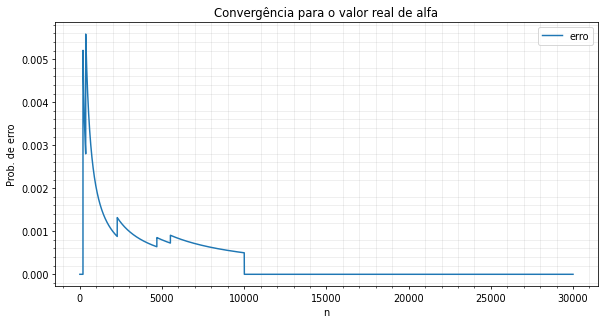

In [585]:
x = np.arange(1,bits+1,1)
plt.figure(figsize=(10,5),dpi=70)
plt.plot(x,ferros,label='erro')
plt.title('Convergência para o valor real de alfa')
plt.ylabel('Prob. de erro')
plt.xlabel('n')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()    
plt.show()

# 2. Variação de $\alpha$ entre $0.01$ e $0.21$ com passos de $0.03$:

In [ ]:
def repete(alfa,bits):
    vetor_bits = np.array([[0] * bits])

    n = vetor_bits[np.random.rand(*vetor_bits.shape) < alfa]
    vetor_bits[np.random.rand(*vetor_bits.shape) < alfa] = 1

    chunked_list = list()
    chunk_size = 3
    for i in range(0, len(vetor_bits.flatten()), chunk_size):
        chunked_list.append(vetor_bits.flatten()[i:i+chunk_size])

    x = nerros = 0
    ferros = []
    f = bits/3
    for i in range(bits):
        ferros.append(0)
    while (x<f):
        v1 = chunked_list[x] == np.array([1,1,1])
        if v1.all() == True:
            nerros += 1
        v2 = chunked_list[x] == np.array([1,1,0])
        if v2.all() == True:
            nerros += 1
        v3 = chunked_list[x] == np.array([1,0,1])
        if v3.all() == True:
            nerros += 1
        v4 = chunked_list[x] == np.array([0,1,1])
        if v4.all() == True:
            nerros += 1
        ferros[x] = nerros/(x+1)
        x += 1   
    print("Número de erros: ",nerros)
    print("Frequência de erros: ",nerros/bits) 
    
    x = np.arange(1,bits+1,1)
    plt.figure(figsize=(10,5),dpi=70)
    plt.plot(x,ferros,label='erro')
    plt.title('Convergência para o valor real de alfa')
    plt.ylabel('Prob. de erro')
    plt.xlabel('n')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()    
    plt.show()

Qual o valor de alfa? 0.01
Número de erros:  3
Frequência de erros:  0.0001


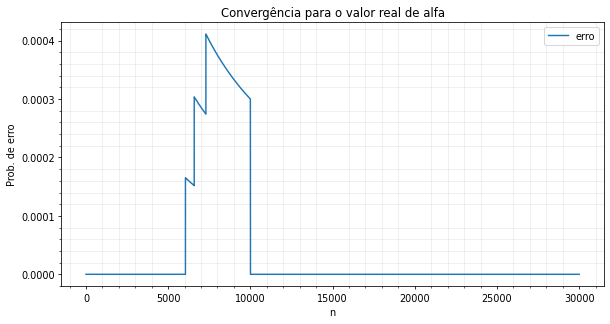

Qual o valor de alfa? 0.04
Número de erros:  42
Frequência de erros:  0.0014


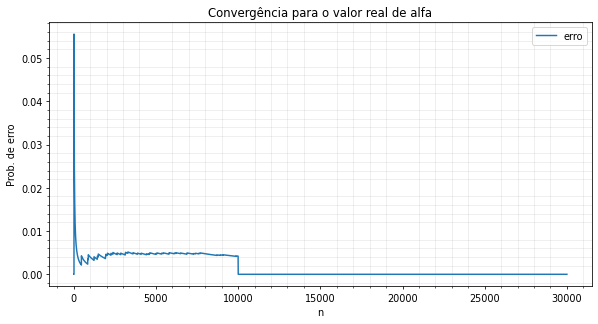

Qual o valor de alfa? 0.07
Número de erros:  132
Frequência de erros:  0.0044


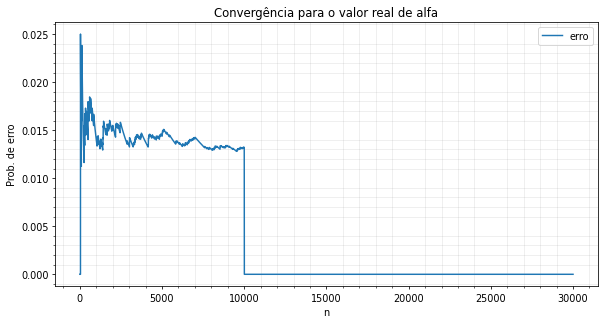

Qual o valor de alfa? 0.10
Número de erros:  291
Frequência de erros:  0.0097


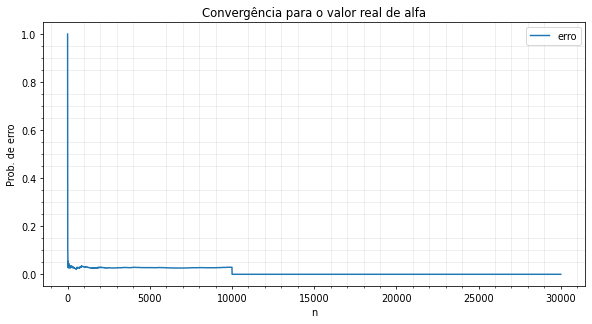

Qual o valor de alfa? 0.13
Número de erros:  457
Frequência de erros:  0.015233333333333333


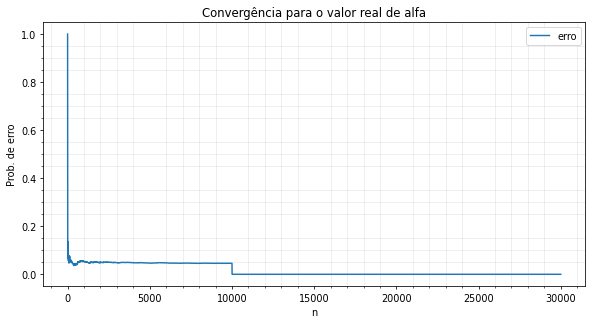

Qual o valor de alfa? 0.16
Número de erros:  704
Frequência de erros:  0.023466666666666667


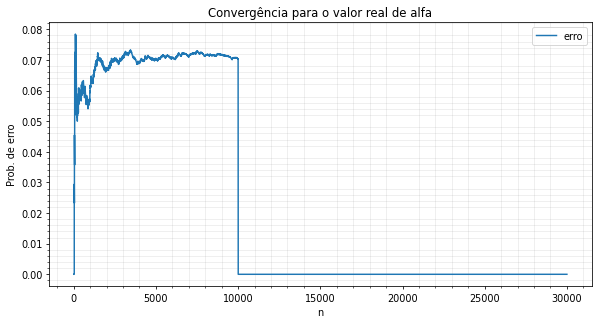

Qual o valor de alfa? 0.19
Número de erros:  933
Frequência de erros:  0.0311


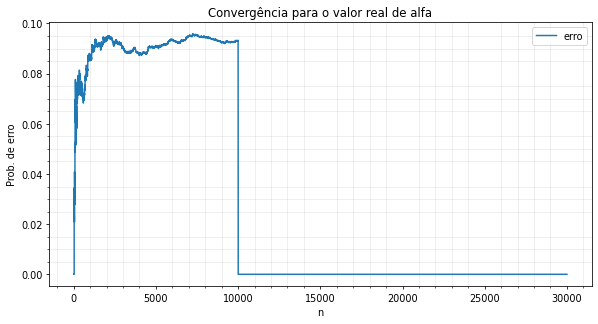

Qual o valor de alfa? 0.21
Número de erros:  1169
Frequência de erros:  0.03896666666666666


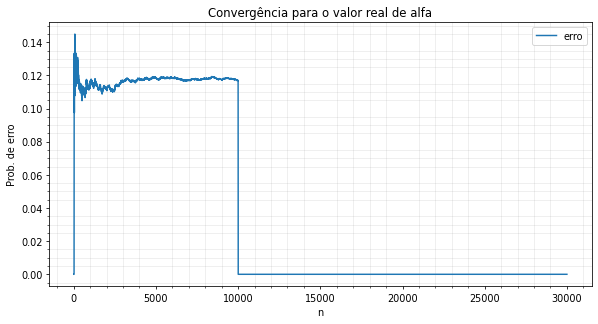

KeyboardInterrupt: Interrupted by user

In [571]:
def menu():
    alfa = float(input('Qual o valor de alfa? '))
    bits = 30000
    repete(alfa,bits)
while True:
    menu()